In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from cnn_model import build_model, train_model, save_cnn_model, load_cnn_model
from models.cnn_v1.cnn_normalize import get_cnn_data
from utils.chart import config_chart, plot_model_performance
from constants import SP500_TICKER

---

## For **build_model** function

In [3]:
model = build_model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 64)             256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 64)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                

---

## For **train_model** function

In [4]:
train, test, predict = get_cnn_data(SP500_TICKER)

x_train = train.x
y_train = train.y
dates_train = train.dates

x_test = test.x
y_test = test.y
dates_test = test.dates

x_predict = predict.x
y_predict = predict.y
dates_predict = predict.dates

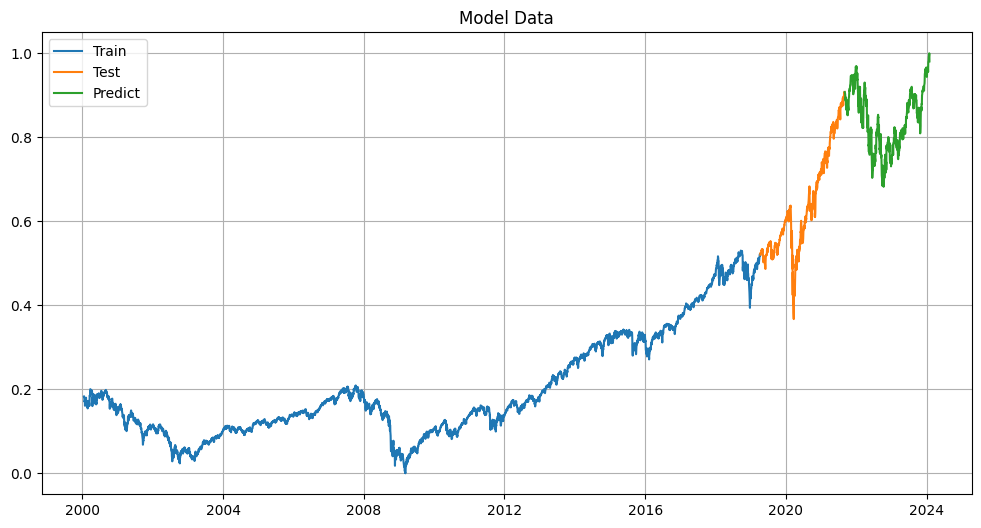

In [5]:
plt = config_chart('Model Data')
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)
plt.plot(dates_predict, y_predict)
plt.legend(['Train', 'Test', 'Predict'])

In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test)

Epoch 1/100


152/152 - 1s - loss: 0.0015 - mean_absolute_error: 0.0168 - accuracy: 2.0670e-04 - 1s/epoch - 7ms/step
Epoch 2/100
152/152 - 0s - loss: 5.8807e-05 - mean_absolute_error: 0.0055 - accuracy: 2.0670e-04 - 287ms/epoch - 2ms/step
Epoch 3/100
152/152 - 0s - loss: 5.6174e-05 - mean_absolute_error: 0.0054 - accuracy: 2.0670e-04 - 285ms/epoch - 2ms/step
Epoch 4/100
152/152 - 0s - loss: 5.6049e-05 - mean_absolute_error: 0.0054 - accuracy: 2.0670e-04 - 261ms/epoch - 2ms/step
Epoch 5/100
152/152 - 0s - loss: 5.7933e-05 - mean_absolute_error: 0.0055 - accuracy: 2.0670e-04 - 274ms/epoch - 2ms/step
Epoch 6/100
152/152 - 0s - loss: 5.4209e-05 - mean_absolute_error: 0.0053 - accuracy: 2.0670e-04 - 285ms/epoch - 2ms/step
Epoch 7/100
152/152 - 0s - loss: 5.3951e-05 - mean_absolute_error: 0.0054 - accuracy: 2.0670e-04 - 260ms/epoch - 2ms/step
Epoch 8/100
152/152 - 0s - loss: 4.9099e-05 - mean_absolute_error: 0.0050 - accuracy: 2.0670e-04 - 310ms/epoch - 2ms/step
Epoch 9/100
152/152 - 0s - lo

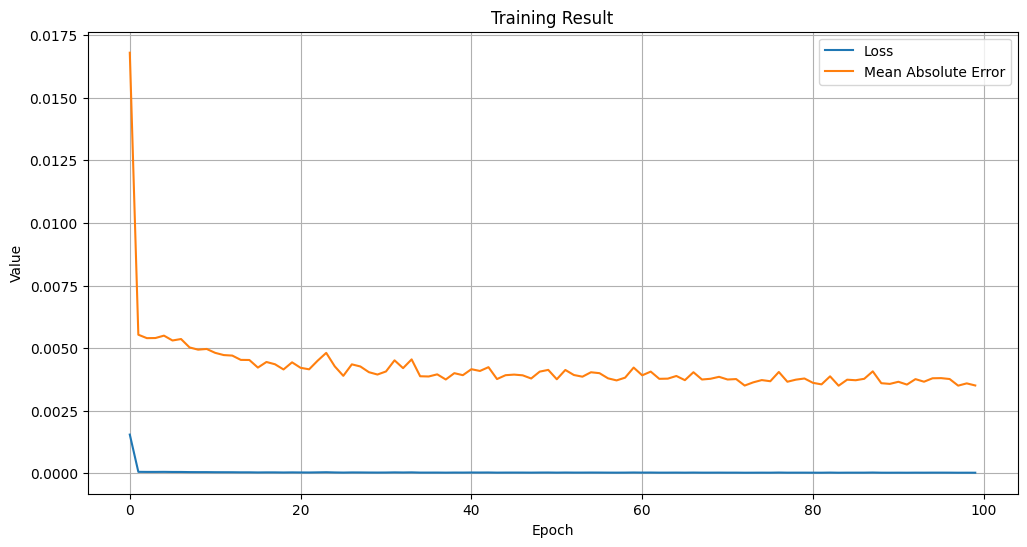

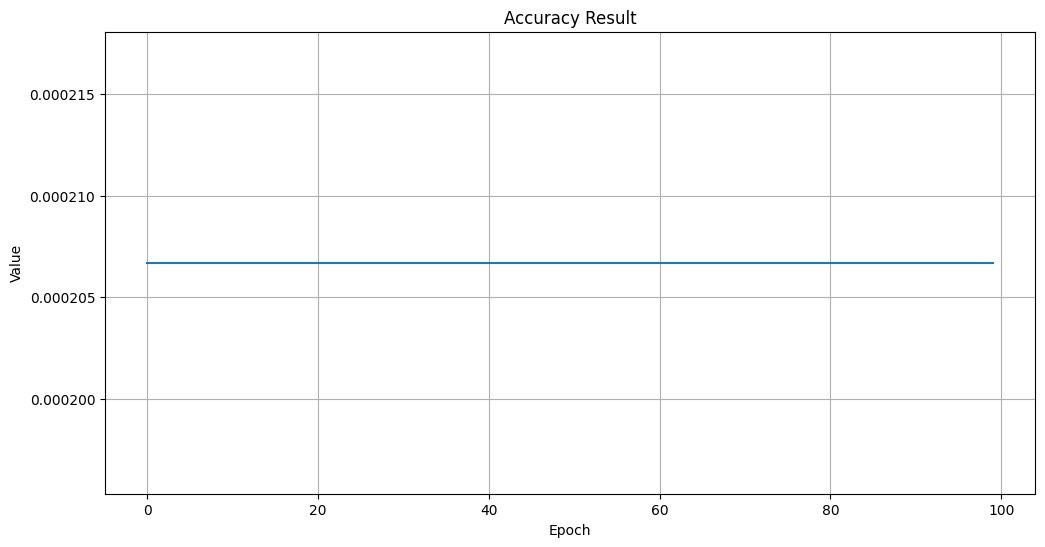

In [7]:
plot_model_performance(fit_result)

In [8]:
save_cnn_model(model)
model = load_cnn_model()

INFO:tensorflow:Assets written to: ./models/cnn_v1/cnn_model_v1\assets


INFO:tensorflow:Assets written to: ./models/cnn_v1/cnn_model_v1\assets


In [9]:
predictions = model.predict(predict.x)

19/19 [==============================] - 0s 1ms/step


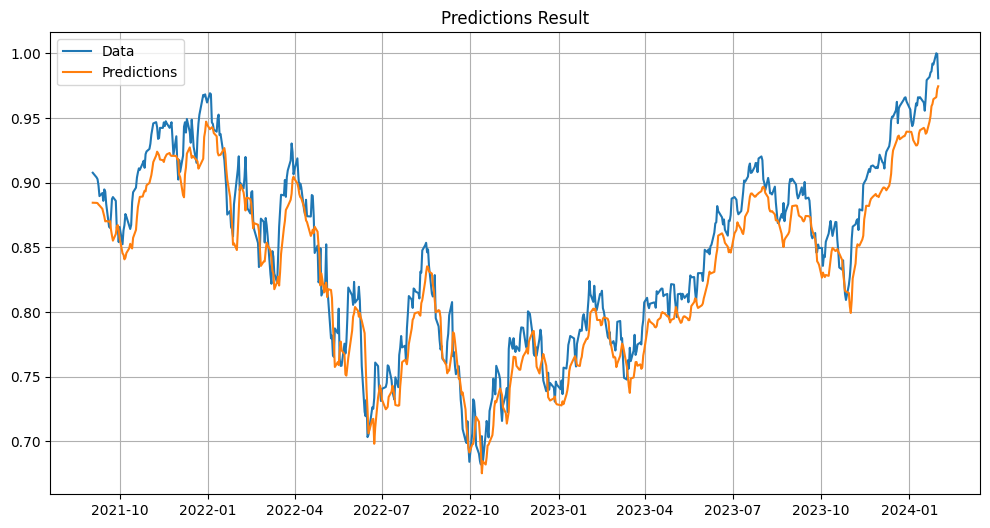

In [10]:
plt = config_chart('Predictions Result')
plt.plot(predict.dates, predict.y)
plt.plot(predict.dates, predictions)
plt.legend(['Data', 'Predictions'])

In [11]:
predictions = model.predict(test.x)

19/19 [==============================] - 0s 1ms/step


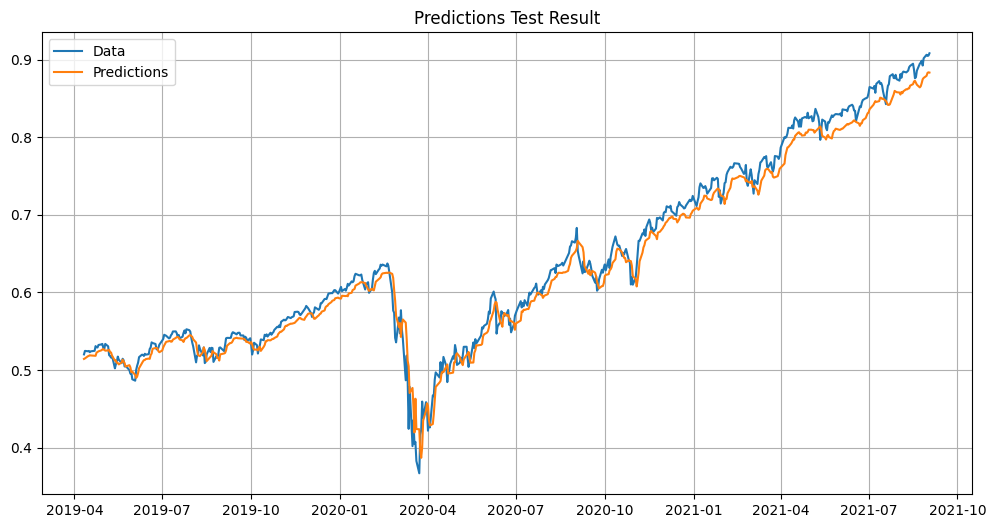

In [12]:
plt = config_chart('Predictions Test Result')
plt.plot(test.dates, test.y)
plt.plot(test.dates, predictions)
plt.legend(['Data', 'Predictions'])